In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
game_id = "4ec9f568-c1f9-4c59-8d4d-70716dde5b0c"
game_df = pd.read_csv(rf"..\data\game_shots\{game_id}.csv")
game_df.head()

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal
0,0,Prawn,0,68,0.513337,False
1,1,enpitsu,0,83,0.621325,True
2,2,Prawn,0,86,0.191604,False
3,3,Zz_GiGi-07_zZ,1,102,0.069428,False
4,4,Prawn,0,123,0.361500,False


In [3]:
game_df.loc[-1] = {'time': 0, 'shot_taker_name': '-', 'goal': 0}
game_df.index += 1
game_df.sort_index(inplace=True)
game_df.loc[len(game_df)] = {'time': max(300, game_df['time'].max()), 'shot_taker_name': '-', 'goal': 0}
orange_xg_sum = game_df[game_df['is_orange']==1]['xg'].cumsum()
game_df['orange_xg_sum'] = orange_xg_sum
blue_xg_sum = game_df[game_df['is_orange']==0]['xg'].cumsum()
game_df['blue_xg_sum'] = blue_xg_sum
game_df.fillna(method='ffill', inplace=True)
game_df.fillna(value=0, inplace=True)

In [4]:
game_df

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal,orange_xg_sum,blue_xg_sum
0,0.0,-,0.0,0,0.000000,0,0.000000,0.000000
1,0.0,Prawn,0.0,68,0.513337,0,0.000000,0.513337
2,1.0,enpitsu,0.0,83,0.621325,1,0.000000,1.134662
3,2.0,Prawn,0.0,86,0.191604,0,0.000000,1.326266
4,3.0,Zz_GiGi-07_zZ,1.0,102,0.069428,0,0.069428,1.326266
5,4.0,Prawn,0.0,123,0.361500,0,0.069428,1.687765
6,5.0,Prawn,0.0,137,0.722483,1,0.069428,2.410248
7,6.0,PG_08_,1.0,170,0.527730,1,0.597158,2.410248
8,7.0,Prawn,0.0,211,0.996170,1,0.597158,3.406418
9,7.0,-,0.0,300,0.996170,0,0.597158,3.406418


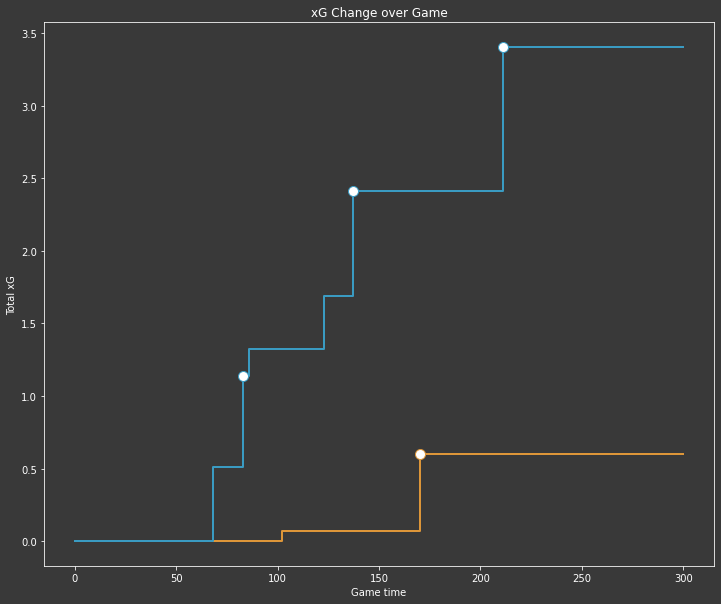

In [5]:
with plt.rc_context({
    'axes.edgecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#393939',
    'axes.labelcolor': 'white',
    'axes.facecolor': '#393939',
    }):
    fig, ax = plt.subplots(figsize=(12,10))
    # ax.set_facecolor('gray')
    # fig.set_facecolor('gray')
    game_df.plot(drawstyle='steps-post', x='time', y='orange_xg_sum', linewidth=2, c='#DD9639', ax=ax, legend=False, zorder=0)
    game_df.plot(drawstyle='steps-post', x='time', y='blue_xg_sum', linewidth=2, c='#3A9BC2', ax=ax, legend=False, zorder=0)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==1)].reset_index().plot.scatter(x='time', y='orange_xg_sum', ax=ax, edgecolor='#DD9639', s=100, c='white', zorder=1)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==0)].reset_index().plot.scatter(x='time', y='blue_xg_sum', ax=ax, edgecolor='#3A9BC2', s=100, c='white', zorder=1)
    plt.title("xG Change over Game", color='white')
    plt.ylabel("Total xG")
    plt.xlabel("Game time")
    

In [15]:
pd.DataFrame(game_df[game_df['shot_taker_name'] != "-"].groupby('shot_taker_name').agg({'xg': 'sum', 'goal': 'sum', 'is_orange': 'first'})).sort_values(by=['is_orange', 'xg'], ascending=[True, False]).rename(columns={'is_orange': 'team (orange)'})

,xg,goal,team (orange)
shot_taker_name,,,
Prawn,2.785094,2,0.0
enpitsu,0.621325,1,0.0
PG_08_,0.527730,1,1.0
Zz_GiGi-07_zZ,0.069428,0,1.0
